# Evaluate Ablation Studies


In [12]:
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
from omegaconf import OmegaConf
from os.path import join

sb.set()
sb.set_style("whitegrid")
sb.set_context("paper")

In [13]:
xticks = [1]
xticks.extend(list(range(10, 110, 10)))
print(xticks)

[1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]


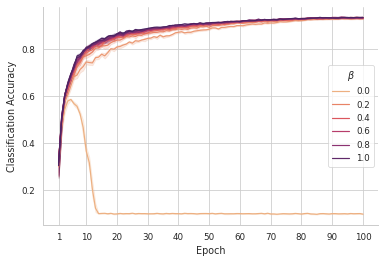

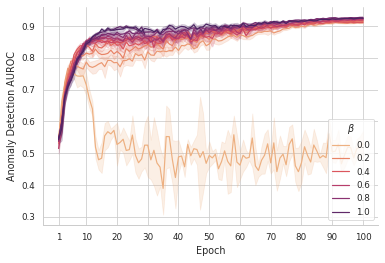

In [14]:
root = "/home/ki/projects/work/mchad/logs/multiruns/ablation/22-15:41:08/"
# root = "/home/ki/projects/work/mchad/logs/multiruns/ablation/12/04/21-14:49:51/"

from matplotlib.ticker import FuncFormatter

dfs = []

for i in range(0, 12):
    # /home/ki/projects/work/mchad/logs/multiruns/ablation/01/20/22-09:18:24
    path = f"{root}/vary_ce/{i}/"
    cfg = OmegaConf.load(join(path, "config.yaml"))
    ce = cfg["weight_ce"]
    df = pd.read_csv(join(path, "csv/version_0/metrics.csv"))

    tmp = df[["epoch", "step", "Distance/OOD/AUROC/val", "Accuracy/val"]].dropna()
    tmp["$\\beta$"] = ce
    tmp["epoch"] += 1
    dfs.append(tmp)

df = pd.concat(dfs).reset_index()

g = sb.lineplot(data=df, x="epoch", y="Accuracy/val", hue="$\\beta$", palette="flare")
plt.xlabel("Epoch")
plt.ylabel("Classification Accuracy")
sb.despine()
g.set(xticks=xticks)
plt.legend(loc="center right", title="$\\beta$")
plt.savefig("out/acc-beta.pgf", dpi=300)
plt.show()


g = sb.lineplot(
    data=df, x="epoch", y="Distance/OOD/AUROC/val", hue="$\\beta$", palette="flare"
)
plt.xlabel("Epoch")
plt.ylabel("Anomaly Detection AUROC")
sb.despine()
g.set(xticks=xticks)
plt.savefig("out/auroc-beta.pgf", dpi=300)
plt.show()

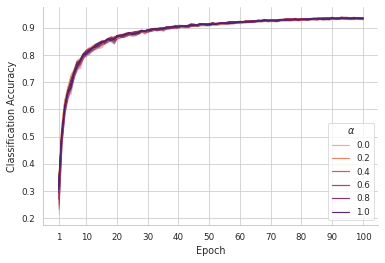

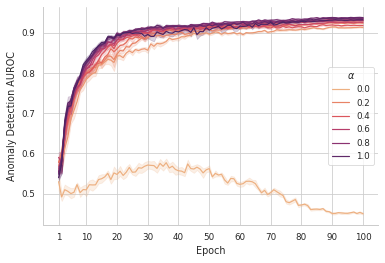

In [15]:
dfs = []

for i in range(0, 12):
    path = f"{root}/vary_center/{i}/"
    cfg = OmegaConf.load(join(path, "config.yaml"))
    ce = cfg["weight_center"]
    df = pd.read_csv(join(path, "csv/version_0/metrics.csv"))

    tmp = df[["step", "epoch", "Distance/OOD/AUROC/val", "Accuracy/val"]].dropna()
    tmp["$\\alpha$"] = ce
    tmp["epoch"] += 1
    dfs.append(tmp)

df = pd.concat(dfs).reset_index()

g = sb.lineplot(data=df, x="epoch", y="Accuracy/val", hue="$\\alpha$", palette="flare")
plt.xlabel("Epoch")
plt.ylabel("Classification Accuracy")
sb.despine()
g.set(xticks=xticks)
plt.savefig("out/acc-alpha.pgf", dpi=300)
plt.show()

g = sb.lineplot(
    data=df, x="epoch", y="Distance/OOD/AUROC/val", hue="$\\alpha$", palette="flare"
)
plt.xlabel("Epoch")
plt.ylabel("Anomaly Detection AUROC")
sb.despine()
g.set(xticks=xticks)
plt.savefig("out/auroc-alpha.pgf", dpi=300)
plt.show()

0.0
2e-06
4e-06
6e-06
8e-06
9.999999999999999e-06


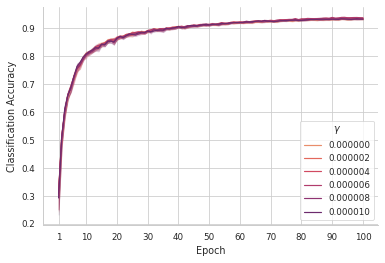

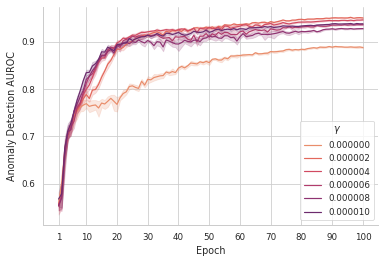

In [16]:
dfs = []

for i in range(0, 12, 2):
    path = f"/{root}/vary_oe/{i}/"
    cfg = OmegaConf.load(join(path, "config.yaml"))
    ce = cfg["weight_oe"]
    print(ce)
    df = pd.read_csv(join(path, "csv/version_0/metrics.csv"))

    tmp = df[["step", "epoch", "Distance/OOD/AUROC/val", "Accuracy/val"]].dropna()
    tmp["$\\gamma$"] = f"{ce:.6f}"
    tmp["epoch"] += 1
    dfs.append(tmp)

df = pd.concat(dfs).reset_index()

g = sb.lineplot(data=df, x="epoch", y="Accuracy/val", legend="full", hue="$\\gamma$",  palette="flare")
plt.xlabel("Epoch")
plt.ylabel("Classification Accuracy")
sb.despine()
g.set(xticks=xticks)
plt.savefig("out/acc-gamma.pgf", dpi=300)
plt.show()

g = sb.lineplot(
    data=df, x="epoch", y="Distance/OOD/AUROC/val", hue="$\\gamma$", palette="flare"
)
plt.xlabel("Epoch")
plt.ylabel("Anomaly Detection AUROC")
g.set(xticks=xticks)
sb.despine()
plt.savefig("out/auroc-gamma.pgf", dpi=300)
plt.show()

In [17]:
df

,index,step,epoch,Distance/OOD/AUROC/val,Accuracy/val,$\gamma$
0,0,38,1.0,0.556992,0.117188,0.000000
1,3,77,1.0,0.568159,0.197070,0.000000
2,6,116,1.0,0.564901,0.217578,0.000000
3,9,155,1.0,0.554457,0.275000,0.000000
4,10,194,1.0,0.558712,0.314063,0.000000
...,...,...,...,...,...,...
5995,2654,39041,100.0,0.937243,0.932422,0.000010
5996,2657,39080,100.0,0.934035,0.933789,0.000010
5997,2660,39119,100.0,0.937987,0.931250,0.000010
5998,2663,39158,100.0,0.937789,0.933594,0.000010
